**Étape 1 : Chargement, exploration et nettoyage des données**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
data = pd.read_csv("/Users/marthaavilas/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
                   

In [4]:
data.info()  #Affiche les colonnes, les lignes , les valeurs nulls et les types de lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Vérifier les valeurs nulles
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Vérifier et supprimer les doublons
print("Doublons avant nettoyage :", data.duplicated().sum())

Doublons avant nettoyage : 0


In [7]:
# Affichage des statistiques et détection d'eventuelles valeurs aberrantes

print('Info statistique des data')
data.describe().round(2)

Info statistique des data


,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Vérifions aussi les types de données uniques pour détecter des anomalies
unique_types = data.dtypes

unique_types


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

*La plupart des colonnes sont de type object (donc des chaînes de caractères), même TotalCharges, qui devrait pourtant être un nombre*



In [11]:
# Tentative de conversion
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Afficher les lignes avec NaN après conversion
data[data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
print("Nombre de lignes avec NaN :", data['TotalCharges'].isna().sum())

Nombre de lignes avec NaN : 11


In [13]:
# Effacer valeurs nuls 
data = data.dropna()
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# Verifier la conversion dtype 
data['TotalCharges'].dtype

dtype('float64')

***Analyse de la variable cible Churn***

Vérifier combien de clients ont churné vs. pas churné

In [17]:
# Compter le nombre de clients par classe
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [18]:
# Pourcentage pour comprendre l’équilibre
data['Churn'].value_counts(normalize=True).round(2) * 100

Churn
No     73.0
Yes    27.0
Name: proportion, dtype: float64

**Visualisation des données**

Comprendre les liens potentiels entre les features et le churn

Répartition du churn (bar plot)

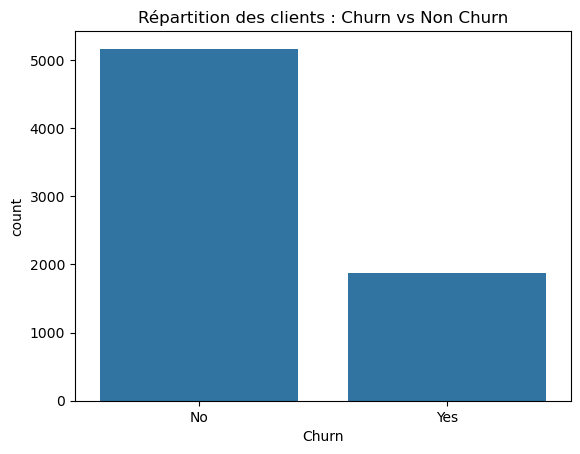

In [22]:
# Graphique simple : combien de clients ont churné
sns.countplot(data=data, x='Churn')
plt.title('Répartition des clients : Churn vs Non Churn')
plt.show()

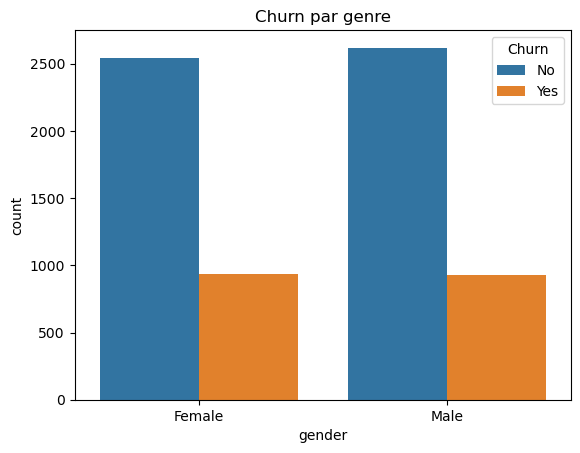

In [23]:
sns.countplot(data=data, x='gender', hue='Churn')
plt.title('Churn par genre')
plt.show()

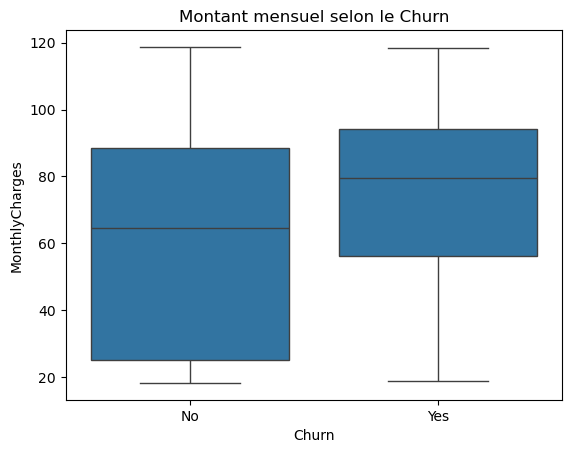

In [24]:
sns.boxplot(data=data, x='Churn', y='MonthlyCharges')
plt.title('Montant mensuel selon le Churn')
plt.show()


 **Encodage des variables catégorielles**

In [26]:
# Sélection des colonnes de type 'object'
object_cols = data.select_dtypes(include='object').columns
object_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [27]:
# Encoder uniquement les colonnes binaires
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [28]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


**Encodage des colonnes à plus de 2 catégories**

 Identifier les colonnes concernées

In [31]:
# Sélectionner à nouveau les colonnes de type texte
object_cols = data.select_dtypes(include='object').columns

# Afficher les colonnes avec leur nombre de catégories uniques
for col in object_cols:
    print(f"{col} : {data[col].nunique()} valeurs uniques")

customerID : 7032 valeurs uniques
MultipleLines : 3 valeurs uniques
InternetService : 3 valeurs uniques
OnlineSecurity : 3 valeurs uniques
OnlineBackup : 3 valeurs uniques
DeviceProtection : 3 valeurs uniques
TechSupport : 3 valeurs uniques
StreamingTV : 3 valeurs uniques
StreamingMovies : 3 valeurs uniques
Contract : 3 valeurs uniques
PaymentMethod : 4 valeurs uniques


In [32]:
# Liste des colonnes à encoder avec One-Hot Encoding
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# Encodage One-Hot avec pandas
data = pd.get_dummies(data, columns=multi_cat_cols, drop_first=True)

In [33]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


**Entraînement des modèles de Machine Learning**

Créer un premier modèle qui prédit si un client va partir ou non.



**Diviser les données en variables X (features) et y (cible)**

In [37]:
# Variable cible (Churn)
y = data['Churn']

# Variables explicatives (on enlève customerID et Churn)
X = data.drop(['customerID', 'Churn'], axis=1)

**Séparer en train et test**

In [39]:
# Découpage des données : 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 **Entraînement dun modèle de Régression Logistique**
j'ai choisi cette modele pour commencer car elle est simple à comprendre et elle fonctionne très bien pour les problèmes de classification binaire


In [41]:
# Créer une instance du modèle
model = LogisticRegression(max_iter=1000)

# Entraîner le modèle avec les données d'entraînement
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
# Prédire les résultats sur les données de test
y_pred = model.predict(X_test)

**Évaluer les performances du modèle**

In [44]:
# Accuracy (taux de prédictions correctes)
acc = accuracy_score(y_test, y_pred)
print("Accuracy du modèle :", round(acc * 100, 2), "%")

Accuracy du modèle : 78.82 %


Environ 78.82% des prédictions du modèle sont correctes. C’est un bon début, mais ce chiffre ne suffit pas à lui seul, surtout dans des cas où les classes sont déséquilibrées (ici : plus de clients restent que partent).

In [46]:
#  Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)


Matrice de confusion :
 [[916 117]
 [181 193]]


True Positives (TP) = 193 : bons churn détectés

True Negatives (TN) = 916 : bons non churn détectés

False Positives (FP) = 117 : clients restés, mais prédits comme churn

False Negatives (FN) = 181 : clients partis, mais prédits comme restés

Ce qui est important ici c’est de réduire les FN, car rater un client qui va partir coûte cher à l’entreprise.

In [48]:
# Rapport complet de classification
report = classification_report(y_test, y_pred)
print("\nRapport de classification :\n", report)


Rapport de classification :
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Classe 0 (Non Churn) :

Précision : 84% → parmi ceux prédits comme clients restés, 84% étaient corrects

Rappel : 89% → le modèle a trouvé 89% des vrais clients restés

F1-score : 86% → équilibre entre précision et rappel

Classe 1 (Churn) :

Précision : 62% → parmi ceux prédits comme churn, 62% étaient corrects

Rappel : 52% → le modèle n’a trouvé que 52% des vrais churn

F1-score : 56% → équilibre entre précision et rappel

**Conclusion**

Le modèle est meilleur pour prédire les clients qui restent que ceux qui partent.
Il faudrait maintenant :

Tester d'autres modèles plus puissants (Random Forest, XGBoost…)



**Entraînement dun modèle de Random Forest**

In [52]:
# Créer le modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [53]:
# Entraîner le modèle
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Prédictions
y_pred_rf = rf_model.predict(X_test)


In [55]:
# Évaluation du modèle
print("Accuracy du modèle Random Forest :", round(accuracy_score(y_test, y_pred_rf)*100, 2), "%")
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))

Accuracy du modèle Random Forest : 78.82 %

Matrice de confusion :
 [[936  97]
 [201 173]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



**Conclusion**

La régression logistique avait 181 FN (clients churn non détectés), ici c’est 201 → un peu moins bon.

Moins de FP ici (97) contre 117 avant → meilleur sur les faux churn prédits à tort.

Précision en churn (1) meilleure que la régression logistique (0.64 vs 0.62)

Mais rappel plus bas (0.46 vs 0.52)

F1-score légèrement en baisse (0.54 vs 0.56)

Random Forest détecte mieux les faux churn, mais rate un peu plus de vrais churn

In [57]:
rf_model.feature_importances_

array([0.02908548, 0.02169022, 0.023638  , 0.01957129, 0.16587949,
       0.00425771, 0.02662061, 0.1676198 , 0.19396815, 0.00413245,
       0.0203079 , 0.03983468, 0.00410523, 0.00830772, 0.02638874,
       0.00578819, 0.0213315 , 0.00369213, 0.01853268, 0.00668245,
       0.02509071, 0.0046642 , 0.01691593, 0.00558644, 0.0176108 ,
       0.02544114, 0.0290487 , 0.0140661 , 0.03707944, 0.01306212])

In [58]:
# Créer un tableau clair : nom de colonne + importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Trier par importance décroissante
importances_sorted = importances.sort_values(ascending=False)

# Afficher les 10 variables les plus importantes
importances_sorted.head(10)

TotalCharges                      0.193968
MonthlyCharges                    0.167620
tenure                            0.165879
InternetService_Fiber optic       0.039835
PaymentMethod_Electronic check    0.037079
gender                            0.029085
Contract_Two year                 0.029049
PaperlessBilling                  0.026621
OnlineSecurity_Yes                0.026389
Contract_One year                 0.025441
dtype: float64

**Modélisation avec XGBoost Classifier**

Tester un modèle encore plus puissant que Random Forest pour mieux détecter les clients à risque de churn, surtout ceux de la classe minoritaire (churn = 1).

In [60]:
# Créer le modèle
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)


In [61]:
# Entraîner le modèle
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
# Prédire
y_pred_xgb = xgb_model.predict(X_test)

In [63]:
# Évaluer
print("Accuracy du modèle XGBoost :", round(accuracy_score(y_test, y_pred_xgb)*100, 2), "%")
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_xgb))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_xgb))

Accuracy du modèle XGBoost : 77.4 %

Matrice de confusion :
 [[903 130]
 [188 186]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



**Conclusion**

Le modèle trouve bien plus de vrais churns que la régression logistique (186 vs 193 vs 173)

Il fait un peu plus d’erreurs sur les faux churns (FP = 130)

Rappel churn = 50% → meilleur que Random Forest (46%), proche de la régression logistique (52%)

F1-score churn = 54% → même que Random Forest, légèrement inférieur à la logistique (56%)

Précision churn = 59% → entre Random Forest (64%) et logistique (62%)

Les 3 modèles sont très proches, mais :

La régression logistique a le meilleur équilibre global

Le Random Forest a la meilleure précision sur les churn

Le XGBoost est bon mais pas meilleur ici



**Tester le modèle LightGBM**

Un modèle très rapide, performant, parfait pour les grandes bases de données ou les compétitions.

In [66]:
# Créer le modèle LightGBM
lgbm_model = LGBMClassifier(random_state=42)

In [67]:
# Entraîner le modèle
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


LGBMClassifier(random_state=42)

In [68]:
# Prédiction
y_pred_lgbm = lgbm_model.predict(X_test)

In [69]:
# Évaluer les performances
print("Accuracy du modèle LightGBM :", round(accuracy_score(y_test, y_pred_lgbm)*100, 2), "%")
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_lgbm))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_lgbm))

Accuracy du modèle LightGBM : 79.1 %

Matrice de confusion :
 [[925 108]
 [186 188]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**Résultats du modèle LightGBM**

Accuracy : 79.1 % C’est le meilleur score de précision globale parmi tous les modèles testés

925 clients ont été prédits correctement comme "restant" → c’est très bien

108 clients ont été prédits à tort comme "churn" alors qu’ils restaient → ce sont des faux positifs 

188 churns ont été bien détectés → ce sont des vrais positifs, et c’est ce qu’on cherche à maximiser 

186 clients ont churné mais le modèle ne l’a pas vu → ce sont les faux négatifs, et on essaie de les minimiser

Meilleure précision globale

F1-score pour churn (1) = 0.56 → à égalité avec la régression logistique, meilleur que XGBoost et Random Forest

Précision churn = 0.64 → très bon score

Rappel churn = 0.50 → assez stable par rapport aux autres

Il est donc sélectionné comme **modèle final** pour la suite du projet.

 **Tuning des hyperparamètre pour améliorer le modèle LightGBM**

In [72]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [15, 31]
}

In [73]:
# Créer le modèle
lgbm = LGBMClassifier(random_state=42)

# Créer GridSearch
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='f1',   # Car notre but est de mieux prédire le churn (classe minoritaire)
    cv=3,
    n_jobs=-1,
    verbose=0
)

# Lancer GridSearch
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Warning] Found white

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'num_leaves': [15, 31]},
             scoring='f1')

In [74]:
print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)

Meilleurs hyperparamètres trouvés : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15}


**Réentraînement avec les meilleurs paramètres**

In [76]:
# Réentraînement avec les meilleurs paramètres trouvés
best_lgbm = LGBMClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    num_leaves=15,
    random_state=42
)

best_lgbm.fit(X_train, y_train)

# Prédictions
y_pred_best = best_lgbm.predict(X_test)

# Évaluation
print("Accuracy du modèle LightGBM optimisé :", round(accuracy_score(y_test, y_pred_best) * 100, 2), "%")
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_best))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_best))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

**Conclusion et interprétation des résultats du modèle optimisé**

Les valeurs optimales des hyperparamètres ont été déterminées via une recherche GridSearchCV. Une grille de valeurs a été définie pour chaque paramètre (learning_rate, max_depth, n_estimators, num_leaves), puis testée par validation croisée. La combinaison offrant le meilleur F1-score a été retenue pour le modèle final.

Accuracy du modèle LightGBM optimisé : 79.96 % 

TN (True Negatives) = 938 : le modèle a bien prédit que le client ne part pas.

TP (True Positives) = 187 : le modèle a bien prédit que le client va partir.

FP (False Positives) = 95 : le modèle a prédit à tort que le client allait partir.

FN (False Negatives) = 187 : le modèle a raté 187 clients qui ont réellement quitté.

Rapport de classification (classe 1 = churn)

Précision (churn) = 0.66 → sur tous les clients que le modèle a prédit comme churn, 66 % étaient bien des churn.

Recall (churn) = 0.50 → le modèle a détecté 50 % des vrais churn.

F1-score (churn) = 0.57 → équilibre entre précision et rappel.

Bonne capacité à prédire les clients restants (classe 0).

Amélioration par rapport aux modèles précédents (f1-score & précision churn meilleurs).

Ce modèle est le plus équilibré jusqu’à maintenant.

**Visualiser la matrice de confusion**

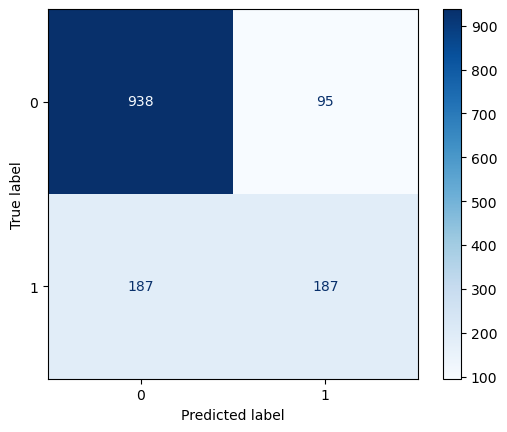

In [79]:
ConfusionMatrixDisplay.from_estimator(best_lgbm, X_test, y_test, cmap='Blues')

**Courbe ROC-AUC**

Pour évaluer la capacité du modèle à distinguer les classes (churn ou non).

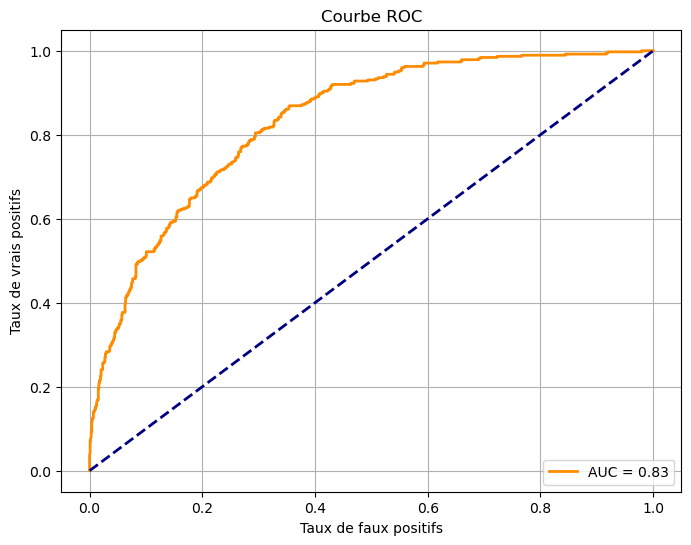

In [81]:
y_proba = best_lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Importance des variables**

Pour savoir quelles sont les variables les plus importantes pour la prédiction.

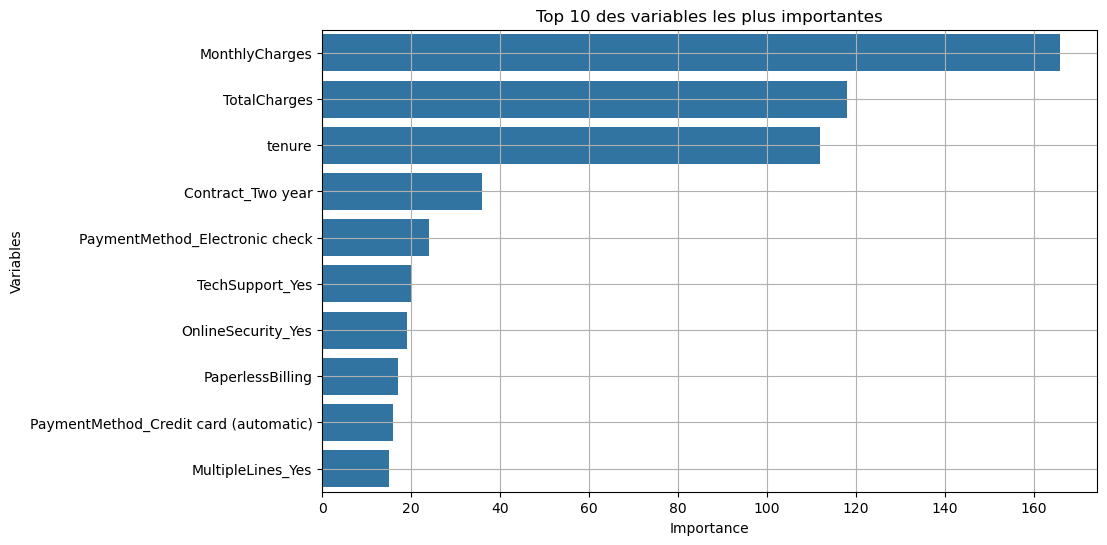

In [83]:
importances = pd.Series(best_lgbm.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances_sorted[:10], y=importances_sorted.index[:10])
plt.title("Top 10 des variables les plus importantes")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.grid()
plt.show()


**Visualiser les clients à risque dans la pratique**

Après avoir entraîné le modèle, il est possible de prédire non seulement la classe (0 ou 1), mais aussi la probabilité que chaque client quitte l’entreprise.


In [85]:
#Ajouter une colonne "probabilité de churn".

# Prédire la probabilité de churn (probabilité d'appartenir à la classe 1 = churn)
y_proba = best_lgbm.predict_proba(X_test)[:, 1]  # [:, 1] = probabilité de la classe 1 (churn)

# Créer un DataFrame avec les résultats
df_resultats = X_test.copy()
df_resultats['Proba_Churn'] = y_proba
df_resultats['Prediction_Churn'] = y_pred_best  # 0 ou 1 selon la prédiction

In [86]:
#Trier les clients à risque élevé

# Afficher les 10 clients les plus à risque
df_resultats.sort_values('Proba_Churn', ascending=False).head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Proba_Churn,Prediction_Churn
1600,1,1,0,0,1,1,1,88.80,88.80,False,...,True,False,False,False,False,False,True,False,0.909055,1
2577,0,0,0,0,1,1,1,94.60,94.60,False,...,True,False,True,False,False,False,True,False,0.894541,1
1976,1,1,0,0,1,1,1,93.55,93.55,False,...,True,False,True,False,False,False,True,False,0.893558,1
2753,0,0,0,0,1,1,0,95.65,95.65,False,...,True,False,True,False,False,False,False,True,0.888009,1
6748,0,1,0,0,1,1,1,85.00,85.00,False,...,False,False,True,False,False,False,True,False,0.887737,1
5186,0,1,0,0,1,0,1,36.45,36.45,True,...,True,False,False,False,False,False,True,False,0.886955,1
1731,0,1,0,0,1,1,1,69.60,69.60,False,...,False,False,False,False,False,False,True,False,0.885163,1
5454,0,1,1,0,1,1,1,69.55,69.55,False,...,False,False,False,False,False,False,True,False,0.885163,1
1325,0,1,0,0,1,1,1,69.25,69.25,False,...,False,False,False,False,False,False,True,False,0.885163,1
6473,0,0,0,0,1,1,0,94.40,94.40,False,...,True,False,True,False,False,False,True,False,0.880839,1


**Exportation à CVS pour usage par une équipe non-technique**

In [88]:
# Joindre à la colonne customerID
df_resultats = df_resultats.merge(data[['customerID']], left_index=True, right_index=True)


In [89]:
# Prédire les probabilités (classe churn = 1)
y_proba = best_lgbm.predict_proba(X_test)[:, 1]

# Convertir en pourcentage (avec arrondi à 2 décimales)
proba_pct = (y_proba * 100).round(2)

In [90]:
# Créer le DataFrame avec résultats
df_resultats = X_test.copy()
df_resultats['Proba_Churn (%)'] = proba_pct
df_resultats['Prediction_Churn'] = y_pred_best

In [91]:
# Ajout des customerID depuis le jeu original
df_resultats = df_resultats.merge(data[['customerID']], left_index=True, right_index=True)

In [92]:
# Exporter pour usage par une équipe non-technique
df_resultats.to_csv("resultats_predictions_churn_porcentage.csv", index=False)


**Créer un système où l’entreprise peut entrer les caractéristiques d’un nouveau client, et obtenir automatiquement:  une prédiction (est-ce qu’il va résilier ou pas), une probabilité de churn (ex. : 69,80 % de risque de résilier).**

In [94]:
# Création d'un nouveau client avec les mêmes colonnes que X_test
new_client = pd.DataFrame([{
    'gender': 0,  # 0 = Female, 1 = Male
    'SeniorCitizen': 1,
    'Partner': 0,
    'Dependents': 0,
    'tenure': 5,
    'PhoneService': 1,
    'PaperlessBilling': 1,
    'MonthlyCharges': 88.80,
    'TotalCharges': 88.80,
    'MultipleLines_No phone service': False,
    'MultipleLines_Yes': True,
    'OnlineSecurity_No': True,
    'OnlineSecurity_Yes': False,
    'OnlineBackup_No': True,
    'OnlineBackup_Yes': False,
    'DeviceProtection_No': True,
    'DeviceProtection_Yes': False,
    'TechSupport_No': True,
    'TechSupport_Yes': False,
    'StreamingTV_No': False,
    'StreamingTV_Yes': True,
    'StreamingMovies_No internet service': False,
    'StreamingMovies_Yes': False,
    'Contract_One year': False,
    'Contract_Two year': False,
    'PaymentMethod_Credit card (automatic)': False,
    'PaymentMethod_Electronic check': True,
    'PaymentMethod_Mailed check': False
}], columns=X_test.columns)  # très important : mêmes colonnes et dans le même ordre


In [95]:
# Prédire la probabilité et la classe
proba = best_lgbm.predict_proba(new_client)[0][1]  # Probabilité d'appartenir à la classe 1 (churn)
classe = best_lgbm.predict(new_client)[0]          # Prédiction finale : 0 ou 1

# Affichage
print(f" Prédiction : {'Résiliation (churn)' if classe == 1 else 'Client fidèle'}")
print(f" Probabilité de churn : {round(proba * 100, 2)} %")


 Prédiction : Résiliation (churn)
 Probabilité de churn : 67.28 %


 **Écrire le script prédictif automatique**

In [191]:
# Charger le fichier
df_nouveaux_clients = pd.read_excel("/Users/marthaavilas/Documents/Proyectos personales/clients_a_tester_.xlsx")

# Afficher la liste des colonnes
print("Colonnes du fichier à tester :")
print(list(df_nouveaux_clients.columns))

# Comparer avec X_test
print("Colonnes attendues par le modèle :")
print(list(X_test.columns))

# Afficher les colonnes en trop
colonnes_en_trop = set(df_nouveaux_clients.columns) - set(X_test.columns)
print("Colonnes à supprimer :", colonnes_en_trop)

# Afficher les colonnes manquantes
colonnes_manquantes = set(X_test.columns) - set(df_nouveaux_clients.columns)
print("Colonnes manquantes :", colonnes_manquantes)


Colonnes du fichier à tester :
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
Colonnes attendues par le modèle :
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'Interne

In [189]:
import pandas as pd

# Charger le fichier Excel avec les nouveaux clients
df_nouveaux_clients = pd.read_excel("/Users/marthaavilas/Documents/Proyectos personales/clients_a_tester_.xlsx")

# Réordonner les colonnes pour correspondre à X_test.columns
df_nouveaux_clients = df_nouveaux_clients[X_test.columns]

# Vérification
print("Fichier chargé et colonnes réordonnées avec succès.")


Fichier chargé et colonnes réordonnées avec succès.


**Prédire avec le modèle**

In [175]:
# Faire les prédictions
proba = best_lgbm.predict_proba(df_nouveaux_clients)[:, 1]  # probabilité de churn (classe 1)
classe = best_lgbm.predict(df_nouveaux_clients)             # prédiction finale (0 ou 1)

# Ajouter les résultats dans le DataFrame
df_nouveaux_clients['Prediction_Churn'] = classe
df_nouveaux_clients['Proba_Churn (%)'] = (proba * 100).round(2)


In [177]:
# Exporter les résultats vers un fichier Excel
df_nouveaux_clients.to_excel("resultats_clients_predits.xlsx", index=False)

print("Prédictions réalisées et fichier exporté avec succès vers resultats_clients_predits.xlsx")


Prédictions réalisées et fichier exporté avec succès vers resultats_clients_predits.xlsx


In [198]:
import joblib

# Enregistrer le modèle dans un fichier
joblib.dump(best_lgbm, "model_lightgbm.pkl")

print("Modèle sauvegardé dans 'model_lightgbm.pkl'")

Modèle sauvegardé dans 'model_lightgbm.pkl'


---

## Conclusion et recommandations

Ce projet de modélisation prédictive du churn client dans le secteur des télécommunications a permis :

- **De construire et comparer plusieurs modèles** (Logistic Regression, Random Forest, XGBoost, LightGBM)
- **D’identifier le modèle LightGBM optimisé comme le plus performant**, avec une accuracy de 79.96 % et un bon compromis entre précision (66 %) et rappel (50 %) sur la classe "churn".
- **De fournir des outils métier** concrets comme la prédiction automatique sur de nouveaux clients via un fichier Excel.

### Recommandations métier

- **Prioriser les clients avec une probabilité de churn > 70 %** pour les campagnes de rétention.
- **Analyser les profils les plus à risque** (clients avec contrat mensuel, fibre optique, pas de service de sécurité ou support technique).
- **Automatiser le modèle dans un outil no-code ou un dashboard Power BI** pour faciliter l’usage par les équipes marketing.

### Limites et pistes d’amélioration

- Prendre en compte d'autres variables externes (satisfaction, retours SAV, interactions récentes).
- Tester des modèles de deep learning ou hybrides.
- Envisager un suivi mensuel du churn avec un système de monitoring.

---

Ce modèle est prêt à être **déployé en environnement réel** pour améliorer la rétention client et guider les décisions stratégiques.
